The purpose of this notebook is to generate rgb images using wafer images and 

Indeed, our initial dataset was containing the gray scale images of wafers and corresponding fluorescent images that are highlighting magnetic resin part.

By combining those two data, we get images containing much more information, and should help to distinguish magnetic part for tissue part.

---

<br>

In [412]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [413]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

In [414]:
# reminder: image is downscaled by 3, we need to downscale the label coordinates as well
scale = 3

In [447]:
DATASET_NUMBER = 3

AUGMENTED_DATASET_PATH = "../augmented_dataset"
FLUO_CROPPED_PATH = f"{AUGMENTED_DATASET_PATH}/fluo_cropped_{DATASET_NUMBER}"
TEST_IMAGES_PATH = "test_images"
# location of silicon wafer 1 data
WAFER_PATH = f"../dataset/silicon_wafer_{DATASET_NUMBER}"

In [448]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

## Load Wafer Image [RED channel]

In [449]:
path_img= f"{WAFER_PATH}/wafer_{DATASET_NUMBER}_downsized_3_intensityCorrected.tif"
wafer_img_intensity = cv.imread(path_img, 0)

In [450]:
wafer_img_intensity.shape

(6367, 8041)

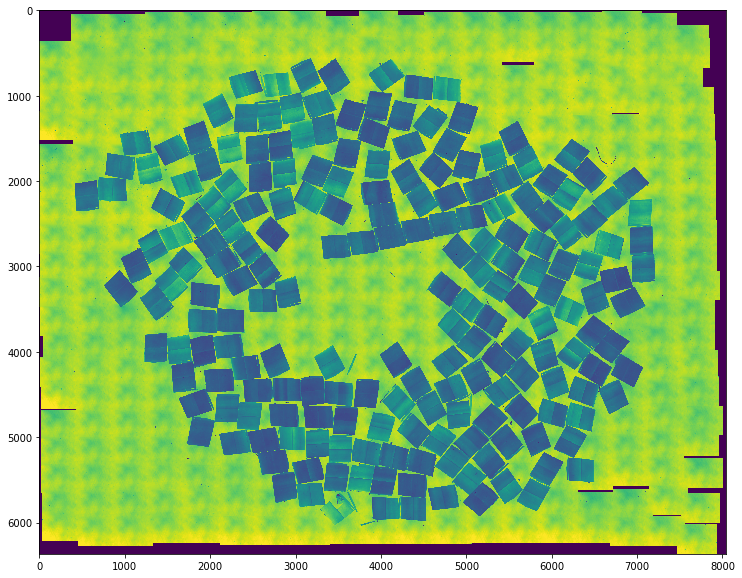

In [451]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_img_intensity)

## Load Fluorescent Wafer Image [GREEN channel]

In [452]:
path_img_magfluo= f"{WAFER_PATH}/wafer_{DATASET_NUMBER}_downsized_3_magFluo.tif"
wafer_fluo_img = cv.imread(path_img_magfluo, 0) # wafer_1_magfluo = cv.cvtColor(wafer_1_magfluo, cv.COLOR_BGR2GRAY)

In [453]:
wafer_fluo_img.shape

(6367, 8041)

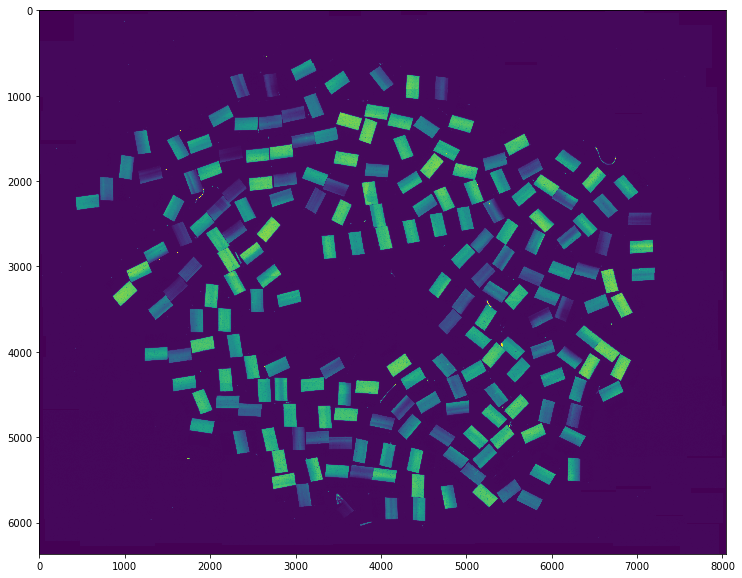

In [454]:
plt.figure(figsize=(15, 10))
plt.imshow(wafer_fluo_img)

## Blank Image [BLUE channel]

In [455]:
width = wafer_fluo_img.shape[0]
height = wafer_fluo_img.shape[1]

In [456]:
blank_img = np.zeros((width, height, 1), np.uint8)

In [457]:
blank_img.shape

(6367, 8041, 1)

# Combine the 3 channels

In [458]:
if len(wafer_img_intensity.shape) == 2:
    wafer_img_intensity = wafer_img_intensity[:, :, np.newaxis]
wafer_img_intensity = wafer_img_intensity[:width,:height]
print(wafer_img_intensity.shape)

if len(wafer_fluo_img.shape) == 2:
    wafer_fluo_img = wafer_fluo_img[:, :, np.newaxis]
wafer_fluo_img = wafer_fluo_img[:width,:height]
print(wafer_fluo_img.shape)


print(blank_img.shape)

(6367, 8041, 1)
(6367, 8041, 1)
(6367, 8041, 1)


In [459]:
rgb_img = np.dstack((wafer_fluo_img,wafer_img_intensity, wafer_img_intensity))
print(rgb_img.shape)

(6367, 8041, 3)


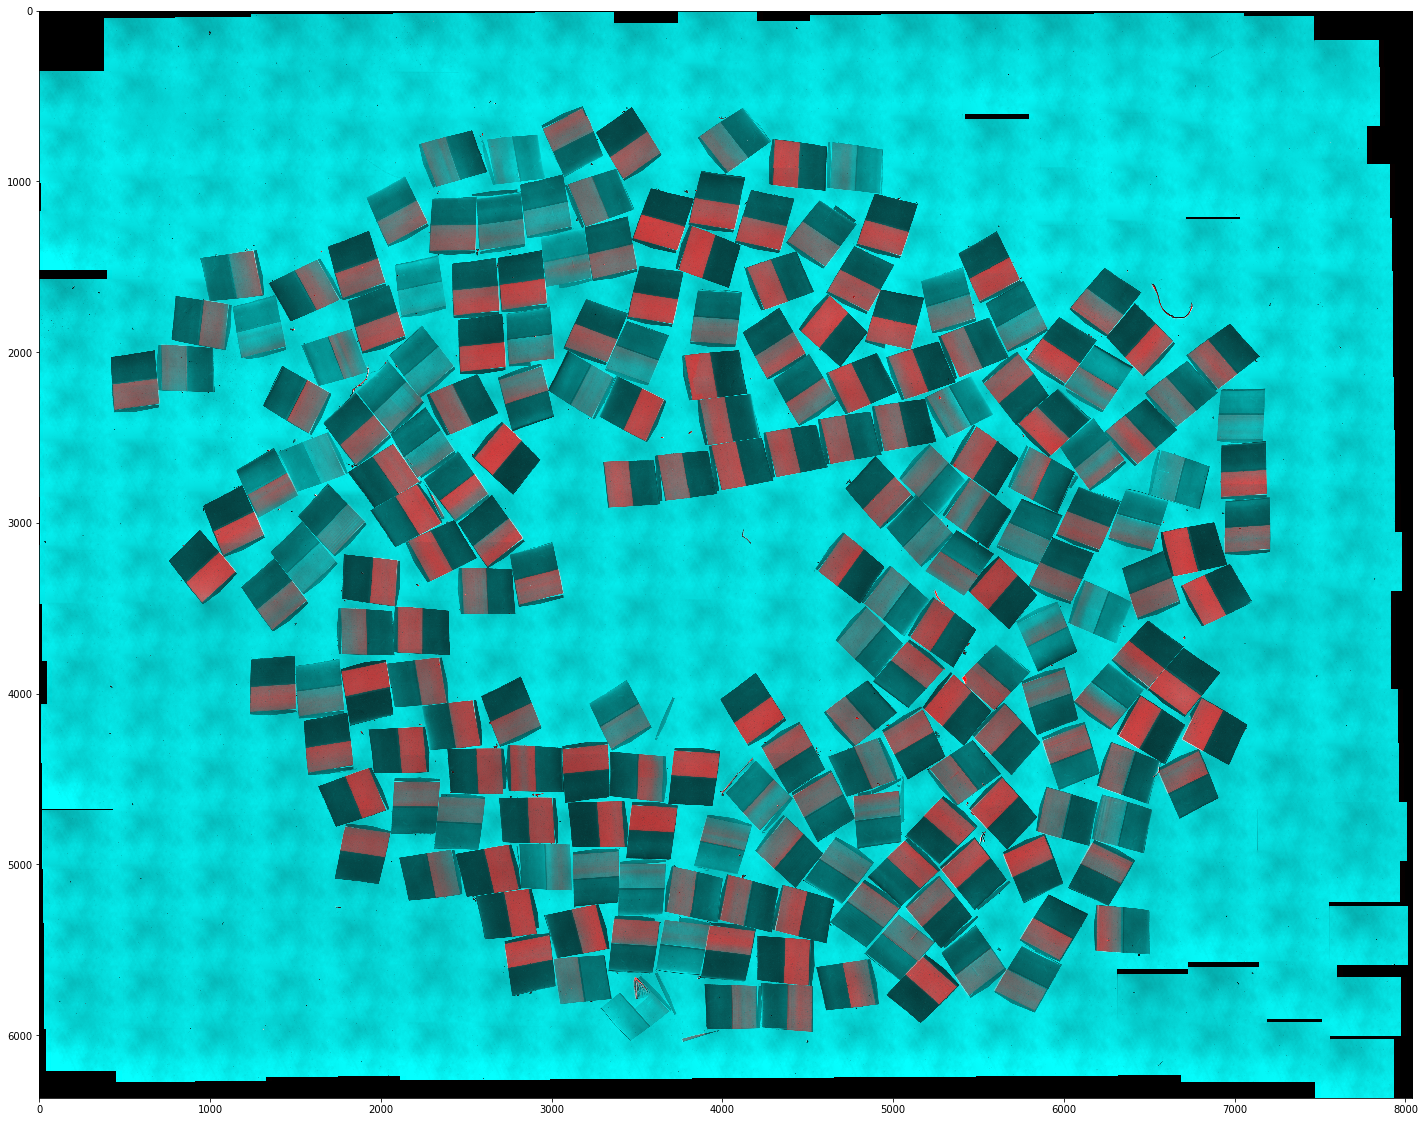

In [460]:
plt.figure(figsize=(25, 20))
plt.imshow(rgb_img)

In [461]:
cv.imwrite(f"{AUGMENTED_DATASET_PATH}/wafer_with_fluo_RGB_{DATASET_NUMBER}.tif", rgb_img)

True

<br>
